# This is Somebody else's notebook 
(Edit this cell and put your name in)

### Make a new cell and use markdown to reproduce the following bullet-item text (without peaking at the actual markdown):

* Go to the [Classics collection of The Collection of Really Great, Interesting, Situated Datasets](https://think.cs.vt.edu/corgis/python/classics/classics.html)
* Download `classics.py` and `classics.db`
* Upload them to the **same** directory as the current notebook file
* Make a new code cell and use `!ls` to double-check that it's in this directory
* Replace `!ls` in that cell with:
```
import classics
list_of_books = classics.get_books(test=True);
```
* Execute that code cell

In [1]:
!wget https://corgis-edu.github.io/corgis/datasets/python/classics/classics.py

--2020-08-18 01:30:40--  https://corgis-edu.github.io/corgis/datasets/python/classics/classics.py
Resolving corgis-edu.github.io (corgis-edu.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to corgis-edu.github.io (corgis-edu.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6630 (6.5K) [application/octet-stream]
Saving to: ‘classics.py’

classics.py         100%[===================>]   6.47K  --.-KB/s    in 0s      

2020-08-18 01:30:40 (54.9 MB/s) - ‘classics.py’ saved [6630/6630]



In [2]:
!wget https://corgis-edu.github.io/corgis/datasets/python/classics/classics.data

--2020-08-18 01:31:05--  https://corgis-edu.github.io/corgis/datasets/python/classics/classics.data
Resolving corgis-edu.github.io (corgis-edu.github.io)... 185.199.111.153, 185.199.110.153, 185.199.109.153, ...
Connecting to corgis-edu.github.io (corgis-edu.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1691742 (1.6M) [application/octet-stream]
Saving to: ‘classics.data’

classics.data       100%[===================>]   1.61M  --.-KB/s    in 0.02s   

2020-08-18 01:31:06 (66.8 MB/s) - ‘classics.data’ saved [1691742/1691742]



In [3]:
import classics

In [5]:
classics.__dir__()

['__name__',
 '__doc__',
 '__package__',
 '__loader__',
 '__spec__',
 '__file__',
 '__cached__',
 '__builtins__',
 '_os',
 '_pickle',
 '__all__',
 '_tifa_definitions',
 '_Constants',
 'DatasetException',
 'get_book']

In [14]:
classics.DatasetException.__dir__()

TypeError: descriptor '__dir__' of 'object' object needs an argument

In [17]:
x = classics.get_book()

In [19]:
x[0]['bibliography']['title']

'Pride and Prejudice'

In [46]:
x[0]

{'bibliography': {'congress classifications': 'PR',
  'languages': 'en',
  'subjects': 'Sisters -- Fiction,Courtship -- Fiction,Social classes -- Fiction,England -- Fiction,Domestic fiction,Young women -- Fiction,Love stories',
  'title': 'Pride and Prejudice',
  'type': 'Text',
  'author': {'birth': 1775, 'death': 1817, 'name': 'Austen, Jane'},
  'publication': {'day': 1,
   'full': 'June, 1998',
   'month': 6,
   'month name': 'June',
   'year': 1998}},
 'metadata': {'downloads': 36576,
  'id': 1342,
  'rank': 1,
  'url': 'https://www.gutenberg.org/ebooks/1342',
  'formats': {'total': 8,
   'types': 'text/plain,text/plain; charset=us-ascii,application/pdf,application/x-mobipocket-ebook,application/zip,application/rdf+xml,application/epub+zip,text/html; charset=us-ascii'}},
 'metrics': {'difficulty': {'automated readability index': 10.7,
   'coleman liau index': 10.73,
   'dale chall readability score': 5.7,
   'difficult words': 9032,
   'flesch kincaid grade': 7.9,
   'flesch readin

In [51]:
import pandas as pd

In [80]:
book_dict = {
    'title':[],
    'readability':[],
    'words':[],
    'avg_sentence_len':[],
    'year':[]
}
for i in x:
    book_dict['title'].append(i['bibliography']['title'])
    book_dict['year'].append(i['bibliography']['publication']['year'])
    book_dict['readability'].append(i['metrics']['difficulty']['flesch kincaid grade'])
    book_dict['words'].append(i['metrics']['statistics']['words'])
    book_dict['avg_sentence_len'].append(i['metrics']['statistics']['average sentence length'])
bookdf = pd.DataFrame(book_dict)
# len(book_dict['title'])
# len(book_dict['readability'])
# len(book_dict['words'])
# len(book_dict['avg_sentence_len'])

In [81]:
bookdf

,title,readability,words,avg_sentence_len,year
0,Pride and Prejudice,7.9,121533,18.0,1998
1,The Yellow Wallpaper,5.6,6067,15.0,1999
2,Alice's Adventures in Wonderland,6.4,26389,17.0,1994
3,"Frankenstein; Or, The Modern Prometheus",9.9,74959,23.0,2008
4,Metamorphosis,10.3,22022,27.0,2005
...,...,...,...,...,...
1001,The Reluctant Heroes,4.0,6913,11.0,2016
1002,"Film Truth; September, 1920",7.6,9153,17.0,2016
1003,Othmar,7.9,191182,21.0,2016
1004,Church History (Volumes 1-3),8.7,730715,17.0,2016


In [82]:
import seaborn as sns

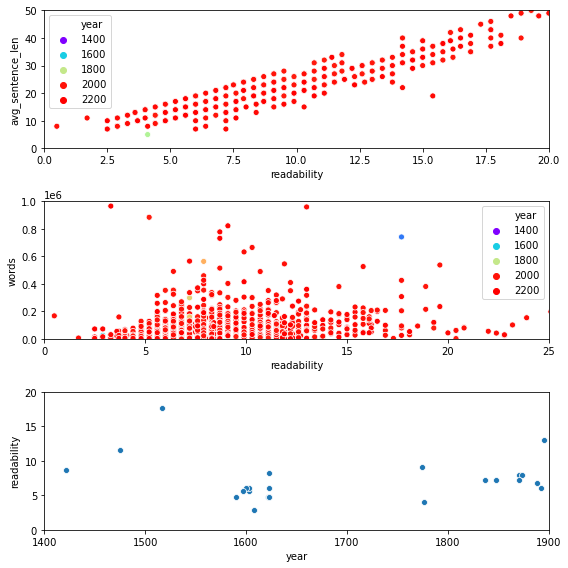

In [98]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1, figsize=(8,8))
sns.scatterplot(bookdf.readability,
                bookdf.avg_sentence_len,
                hue=bookdf.year,
                palette='rainbow',
                ax=ax1);
sns.scatterplot(bookdf.readability,
                bookdf.words,
                hue=bookdf.year,
                palette='rainbow',
                ax=ax2);
sns.scatterplot(bookdf.year,
                bookdf.readability,
                palette='rainbow',
                ax=ax3);
ax1.set_xlim([0,20])
ax1.set_ylim([0,50])
ax2.set_xlim([0,25])
ax2.set_ylim([0,1e6])
ax3.set_xlim([1400,1900])
ax3.set_ylim([0,20])
fig.tight_layout()

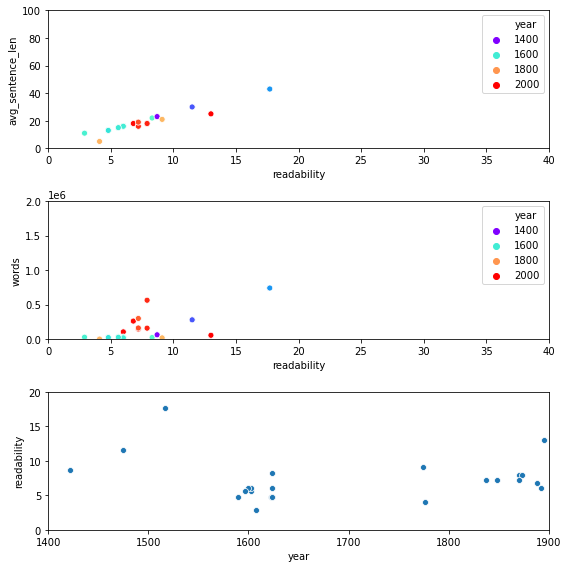

In [102]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1, figsize=(8,8))
sns.scatterplot(bookdf.loc[bookdf['year']<1900].readability,
                bookdf.loc[bookdf['year']<1900].avg_sentence_len,
                hue=bookdf.loc[bookdf['year']<1900].year,
                palette='rainbow',
                ax=ax1);
sns.scatterplot(bookdf.loc[bookdf['year']<1900].readability,
                bookdf.loc[bookdf['year']<1900].words,
                hue=bookdf.loc[bookdf['year']<1900].year,
                palette='rainbow',
                ax=ax2);
sns.scatterplot(bookdf.year,
                bookdf.readability,
                palette='rainbow',
                ax=ax3);
ax1.set_xlim([0,40])
ax1.set_ylim([0,100])
ax2.set_xlim([0,40])
ax2.set_ylim([0,2e6])
ax3.set_xlim([1400,1900])
ax3.set_ylim([0,20])
fig.tight_layout()

In [84]:
bookdf.loc[bookdf['readability'] > 40]

,title,readability,words,avg_sentence_len,year
544,Fifteen Thousand Useful Phrases: A Practical H...,96.1,81607,235.0,2006


In [87]:
bookdf.loc[bookdf['title']=='War and Peace']

,title,readability,words,avg_sentence_len,year
19,War and Peace,7.9,563029,18.0,1870


In [89]:
bookdf.loc[bookdf['avg_sentence_len'] > 40]

,title,readability,words,avg_sentence_len,year
15,A Modest Proposal: For preventing the children...,20.4,3410,50.0,1997
42,The Life and Adventures of Robinson Crusoe,19.3,120813,50.0,2010
60,Second Treatise of Government,22.0,56543,54.0,2005
89,Don Quixote,17.7,425899,46.0,2004
94,Paradise Lost,19.3,79996,50.0,1991
96,Utopia,22.4,43482,55.0,2005
132,Memoirs Of Fanny Hill: A New and Genuine Editi...,20.8,84602,51.0,2008
210,Discourse on the Method of Rightly Conducting ...,31.7,23024,79.0,2008
238,The Decameron of Giovanni Boccaccio,17.7,307841,43.0,2007
248,The Ladies Delight,17.3,4863,45.0,2004


In [105]:
bookdf.loc[bookdf['readability'] < 3]

,title,readability,words,avg_sentence_len,year
148,A Concise Dictionary of Middle English from A....,0.5,168326,8.0,2004
251,Second Variety,2.5,15237,7.0,2010
390,The Tempest: The Works of William Shakespeare ...,2.9,23337,11.0,2007
636,Beyond Lies the Wub,2.5,2694,7.0,2009
643,The Tragedy of King Lear,2.9,27527,11.0,1608
765,"McGuffey's First Eclectic Reader, Revised Edition",1.7,7573,11.0,2005
783,Hunt the Hunter,2.9,5524,8.0,2016
810,1001 zadacha dlia umstvennogo scheta,-12.5,27030,8.0,2005
812,Sordman the Protector,2.9,7989,8.0,2016
817,Mr. Spaceship,2.9,10562,8.0,2010


In [6]:
list_of_books = classics.get_book(test=True);

TypeError: get_book() got an unexpected keyword argument 'test'

### And now follow the list of instructions that you just typed

In [ ]:
# After importing classics (from the above instruction list)
# execute this cell
list_of_books[0]['bibliography']['title']

In [21]:
# Put a command here that gives you help documentation about list_of_books
# What is the length of the book list?

len(x)

1006

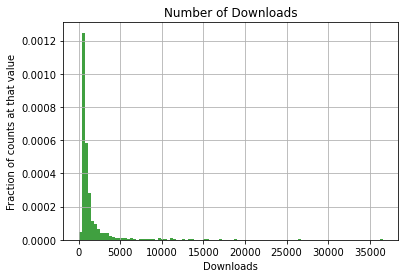

In [22]:
# Execute this cell

%matplotlib inline
import matplotlib.pyplot as plt

list_of_books = x
downloads = []
for i in range(len(list_of_books)):
    # data to plot
    data_to_plot = list_of_books[i]['metadata']['downloads']
    downloads.append(data_to_plot)
plt.hist(downloads, 100, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Downloads')
plt.ylabel('Fraction of counts at that value')
plt.title('Number of Downloads')
plt.grid(True)
plt.show()

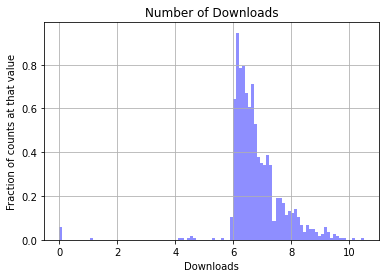

In [26]:
# Execute this cell

%matplotlib inline
import matplotlib.pyplot as plt
import math

list_of_books = x
downloads = []
for i in range(len(list_of_books)):
    # data to plot
    data_to_plot = list_of_books[i]['metadata']['downloads']
    if data_to_plot != 0:
        data_to_plot = math.log(data_to_plot)
    downloads.append(data_to_plot)
plt.hist(downloads, 100, density=True, facecolor='b', alpha=0.445)
plt.xlabel('Downloads')
plt.ylabel('Fraction of counts at that value')
plt.title('Number of Downloads')
plt.grid(True)
plt.show()

### That plot shows a definite trend, but it's difficult to see some of the higher values
* Make a duplicate copy of that cell
* include `import math`
* use the `math.log` function on the data
* Re-execute the cell
* Change the facecolor and alpha and keep re-plotting to see what they do

### Using only keystrokes, go back up to the top of the notebook, copy the top cell, and paste it below this cell.

### Change the title of this notebook

## Bonus:
* Make a function that prints the title and number of downloads for a given index in list_of_books
* Make an interactive widget that combines this function with an integer slider 
  * that is, the value of the integer slider will determine which book's info is printed

In [28]:
x[0]['bibliography']['title']

'Pride and Prejudice'

In [30]:
x[0]['metadata']['downloads']

36576

In [31]:
import ipywidgets

In [36]:
books = []
for i in x:
    books.append(i['bibliography']['title'])

In [35]:
def p(book='Pride and Prejudice'):
    for i in x:
        if x[i]['bibliography']['title'] == book:
            print(x[book]['bibliography']['title'] + ': ' + str(x[book]['metadata']['downloads']))
    
ipywidgets.interact(p,book=(0,len(x)))

interactive(children=(IntSlider(value=0, description='book', max=1006), Output()), _dom_classes=('widget-inter…

<function __main__.p(book=0)>

In [39]:
books

['Pride and Prejudice',
 'The Yellow Wallpaper',
 "Alice's Adventures in Wonderland",
 'Frankenstein; Or, The Modern Prometheus',
 'Metamorphosis',
 'Adventures of Huckleberry Finn',
 'The Importance of Being Earnest: A Trivial Comedy for Serious People',
 'The Adventures of Tom Sawyer',
 'Narrative of the Life of Frederick Douglass, an American Slave',
 "A Doll's House : a play",
 'Moby Dick; Or, The Whale',
 'The Adventures of Sherlock Holmes',
 'Great Expectations',
 'Ulysses',
 'A Tale of Two Cities',
 'A Modest Proposal: For preventing the children of poor people in Ireland, from being a burden on their parents or country, and for making them beneficial to the publick',
 'Dracula',
 'The Prince',
 'The Picture of Dorian Gray',
 'War and Peace',
 "Grimms' Fairy Tales",
 'The Kama Sutra of Vatsyayana: Translated From the Sanscrit in Seven Parts With Preface, Introduction and Concluding Remarks',
 'Emma',
 'Beowulf: An Anglo-Saxon Epic Poem',
 'Les Misérables',
 'The Romance of Lust:

In [45]:
def p(book='Pride and Prejudice'):
    for i in x:
        if i['bibliography']['title'] == book:
            print(i['bibliography']['title'] + ': ' + str(i['metadata']['downloads']))
    
ipywidgets.interact(p,book=sorted(books));

interactive(children=(Dropdown(description='book', index=493, options=('"1812" Napoleon I in Russia', '"De Bel…

# Classic texts

* Data is taken from CORGIS (The Collection of Really Great, Interesting, Situated Datasets)
* https://corgis-edu.github.io/corgis/csv/classics/
* Information about the top-1000 downloaded books from Project Gutenberg

To get the HTML table of "Key Descriptions" from the above link, we can use `requests` to get the web page and `BeautifulSoup4` to grab the table.  `BeautifulSoup4` is a Python library for pulling data out of HTML and XML files.

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
htmldoc = requests.get('https://corgis-edu.github.io/corgis/csv/classics/index.html')

In [3]:
htmldoc.text

'<!DOCTYPE html>\n<html lang="en-US">\n    <head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n\n    \n    \n\n    <title>CORGIS Datasets Project</title>\n    <meta name="description" content="\n\n\n\n\n\n\n            Github Pages for CORGIS Datasets Project">\n    <link rel="canonical" href="https://corgis-edu.github.io//corgis/csv/classics/">\n\n    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">\n    <link rel="stylesheet" href="https://code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">\n    <link rel="stylesheet" href="/corgis/assets/css/main.css">\n\n    \n\n    \n        <link rel="stylesheet" href="/corgis/assets/css/pygments.css">\n\n        <style>\n            .ui-dialog-titlebar-close {\n                padding: 0 !important;\n            }\n\n            .ui-dialog-titlebar-close:af

In [4]:
soup = BeautifulSoup(htmldoc.text)

In [5]:
soup

<!DOCTYPE html>
<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<title>CORGIS Datasets Project</title>
<meta content="






            Github Pages for CORGIS Datasets Project" name="description"/>
<link href="https://corgis-edu.github.io//corgis/csv/classics/" rel="canonical"/>
<link href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" rel="stylesheet"/>
<link href="https://code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css" rel="stylesheet"/>
<link href="/corgis/assets/css/main.css" rel="stylesheet"/>
<link href="/corgis/assets/css/pygments.css" rel="stylesheet"/>
<style>
            .ui-dialog-titlebar-close {
                padding: 0 !important;
            }

            .ui-dialog-titlebar-close:after {
                content: '';
                width: 20px;
                height: 20px;
               

In [6]:
t = soup.find('table')

In [7]:
t

<table class="table table-condensed table-striped table-bordered table-hover">
<tr>
<th class="">Key</th>
<th class="">List of...</th>
<th class="">Comment</th>
<th class="">Example Value</th>
</tr>
<tr>
<td>bibliography.congress classifications</td>
<td>String</td>
<td>$MISSING_FIELD</td>
<td><code>"PR"</code></td>
</tr>
<tr>
<td>bibliography.languages</td>
<td>String</td>
<td>$MISSING_FIELD</td>
<td><code>"en"</code></td>
</tr>
<tr>
<td>bibliography.subjects</td>
<td>String</td>
<td>$MISSING_FIELD</td>
<td><code>"Sisters -- Fiction,Courtship -- Fiction,Social classes -- Fiction,England -- Fiction,Domestic fiction,Young women -- Fiction,Love stories"</code></td>
</tr>
<tr>
<td>bibliography.title</td>
<td>String</td>
<td>$MISSING_FIELD</td>
<td><code>"Pride and Prejudice"</code></td>
</tr>
<tr>
<td>bibliography.type</td>
<td>String</td>
<td>$MISSING_FIELD</td>
<td><code>"Text"</code></td>
</tr>
<tr>
<td>metadata.downloads</td>
<td>Integer</td>
<td>The number of times this book has been

In [8]:
import pandas as pd

In [9]:
pd.read_html(str(t))

[                                                Key List of...  \
 0             bibliography.congress classifications     String   
 1                            bibliography.languages     String   
 2                             bibliography.subjects     String   
 3                                bibliography.title     String   
 4                                 bibliography.type     String   
 5                                metadata.downloads    Integer   
 6                                       metadata.id    Integer   
 7                                     metadata.rank    Integer   
 8                                      metadata.url     String   
 9                         bibliography.author.birth    Integer   
 10                        bibliography.author.death    Integer   
 11                         bibliography.author.name     String   
 12                     bibliography.publication.day    Integer   
 13                    bibliography.publication.full     Strin

In [10]:
df = pd.read_html(str(t))[0]

In [11]:
df

,Key,List of...,Comment,Example Value
0,bibliography.congress classifications,String,$MISSING_FIELD,"""PR"""
1,bibliography.languages,String,$MISSING_FIELD,"""en"""
2,bibliography.subjects,String,$MISSING_FIELD,"""Sisters -- Fiction,Courtship -- Fiction,Socia..."
3,bibliography.title,String,$MISSING_FIELD,"""Pride and Prejudice"""
4,bibliography.type,String,$MISSING_FIELD,"""Text"""
5,metadata.downloads,Integer,The number of times this book has been downloa...,36576
6,metadata.id,Integer,Every book on Project Gutenberg has a unique I...,1342
7,metadata.rank,Integer,The rank of this book in comparison to other b...,1
8,metadata.url,String,$MISSING_FIELD,"""https://www.gutenberg.org/ebooks/1342"""
9,bibliography.author.birth,Integer,The recorded birth year of the author. If thei...,1775


[The file 'classic-utf8.csv' was obtained from the corgis data site, but resaved as a utf-8 formatted data file.]

In [13]:
booksdf = pd.read_csv('data/classics-utf8.csv')

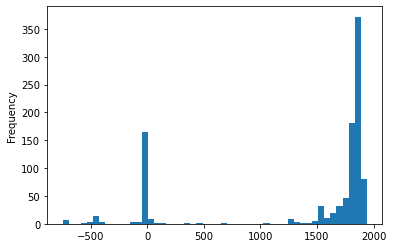

In [19]:
booksdf['bibliography.author.birth'].plot.hist(bins=50)

In [24]:
booksdf.loc[(-100 < booksdf['bibliography.author.death']) & (booksdf['bibliography.author.death'] < 100)]

,bibliography.congress classifications,bibliography.languages,bibliography.subjects,bibliography.title,bibliography.type,metadata.downloads,metadata.id,metadata.rank,metadata.url,bibliography.author.birth,...,metrics.sentiments.polarity,metrics.sentiments.subjectivity,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
21,HQ,en,"Love,Sex",The Kama Sutra of Vatsyayana: Translated From ...,Text,8559,27827,22,https://www.gutenberg.org/ebooks/27827,0,...,0.131070,0.464221,4.81,24.0,0.04,283286,1464,2397,81087.3,58912
23,PR,en,"Dragons -- Poetry;Epic poetry, English (Old);M...",Beowulf: An Anglo-Saxon Epic Poem,Text,8199,16328,24,https://www.gutenberg.org/ebooks/16328,0,...,0.137129,0.537179,5.45,18.0,0.06,211970,900,2142,54235.8,38925
25,PR,en,Erotic stories,The Romance of Lust: A Classic Victorian eroti...,Text,7458,30254,26,https://www.gutenberg.org/ebooks/30254,0,...,0.191171,0.546651,4.64,24.0,0.04,876698,4879,7588,256281.3,188911
53,TJ,en,"Steam-boilers, Water-tube","Steam, Its Generation and Use",Text,4297,22657,54,https://www.gutenberg.org/ebooks/22657,0,...,0.067528,0.437560,5.59,19.0,0.05,760404,8364,6885,189327.6,135920
61,BS,en,Bible,The King James Version of the Bible,Text,3776,10,62,https://www.gutenberg.org/ebooks/10,0,...,0.115735,0.515710,4.49,27.0,0.04,3684178,9815,29667,991401.3,821130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,NaN,en,NaN,"The Donkey, the Elephant, and the Goat: At a P...",Text,72,51473,998,https://www.gutenberg.org/ebooks/51473,1888,...,0.109560,0.484560,5.22,19.0,0.05,12424,35,125,3222.0,2381
999,NaN,en,NaN,Flying Machines Today,Text,3,51481,1000,https://www.gutenberg.org/ebooks/51481,0,...,0.088937,0.437484,5.30,21.0,0.05,175917,2178,1558,51192.0,33189
1000,NaN,en,NaN,Perfect Answer,Text,0,51482,1001,https://www.gutenberg.org/ebooks/51482,0,...,0.110883,0.504681,4.99,11.0,0.09,19328,127,332,5436.9,3871
1002,NaN,en,NaN,"Film Truth; September, 1920",Text,0,51484,1003,https://www.gutenberg.org/ebooks/51484,0,...,0.143879,0.485782,5.02,17.0,0.06,45970,312,536,13080.6,9153


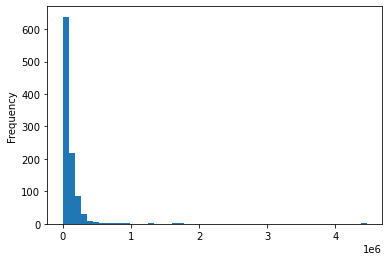

In [14]:
booksdf['metrics.statistics.words'].plot.hist(bins=50)

In [15]:
import math

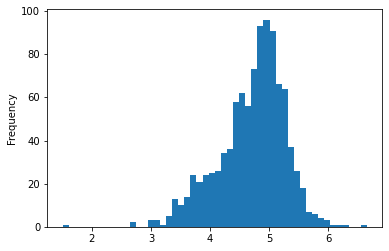

In [16]:
booksdf['metrics.statistics.words'].apply(lambda x: math.log(x,10)).plot.hist(bins=50)

KeyError: "None of [Int64Index([121533,   6067,  26389,  74959,  22022, 111219,  20625,  70796,\n             40740,  26466,\n            ...\n              4352,   2381,  47873,  33189,   3871,   6913,   9153, 191182,\n            730715,  95496],\n           dtype='int64', length=1006)] are in the [columns]"

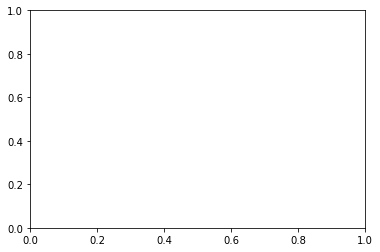

In [17]:
booksdf.plot.scatter(x=booksdf['metrics.statistics.words'],
                     y=booksdf['metrics.statistics.words'])

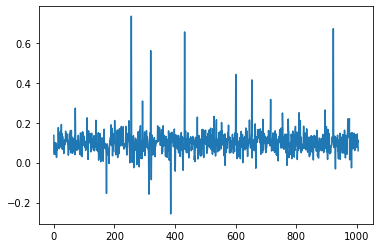

In [14]:
booksdf['metrics.sentiments.polarity'].plot()

In [15]:
import seaborn

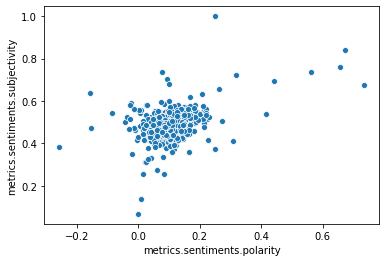

In [16]:
seaborn.scatterplot(booksdf['metrics.sentiments.polarity'],
                    booksdf['metrics.sentiments.subjectivity'])


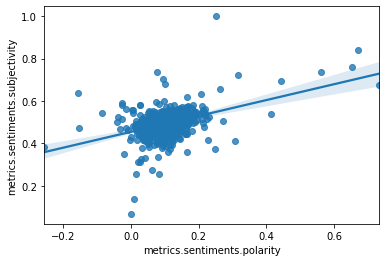

In [23]:
seaborn.regplot(booksdf['metrics.sentiments.polarity'],
                    booksdf['metrics.sentiments.subjectivity'])


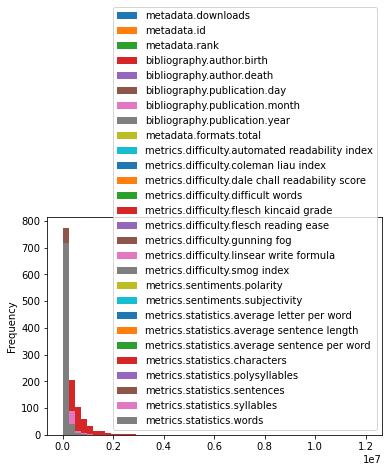

In [25]:
booksdf.loc[booksdf['bibliography.author.birth'] > 1500].plot.hist(bins=50)

In [29]:
import math

Error in callback <function flush_figures at 0x7f965bcf29d0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
booksdf.loc[:,booksdf.]

In [48]:
[i for i in booksdf.columns if 'metrics.difficulty' in i]

['metrics.difficulty.automated readability index',
 'metrics.difficulty.coleman liau index',
 'metrics.difficulty.dale chall readability score',
 'metrics.difficulty.difficult words',
 'metrics.difficulty.flesch kincaid grade',
 'metrics.difficulty.flesch reading ease',
 'metrics.difficulty.gunning fog',
 'metrics.difficulty.linsear write formula',
 'metrics.difficulty.smog index']

In [49]:
booksdf.loc[:,[i for i in booksdf.columns if 'metrics.difficulty' in i]]

,metrics.difficulty.automated readability index,metrics.difficulty.coleman liau index,metrics.difficulty.dale chall readability score,metrics.difficulty.difficult words,metrics.difficulty.flesch kincaid grade,metrics.difficulty.flesch reading ease,metrics.difficulty.gunning fog,metrics.difficulty.linsear write formula,metrics.difficulty.smog index
0,10.7,10.73,5.70,9032,7.9,70.13,9.2,13.5,3.1
1,7.2,8.00,6.24,714,5.6,81.63,8.0,5.5,3.1
2,9.3,9.39,5.93,2425,6.4,79.60,8.8,14.0,3.1
3,12.6,10.68,6.44,7884,9.9,65.05,11.2,7.0,3.1
4,13.8,9.46,6.37,1947,10.3,69.45,12.8,10.5,3.1
...,...,...,...,...,...,...,...,...,...
1001,6.2,8.68,6.09,835,4.0,85.69,6.4,5.0,3.1
1002,10.8,11.54,7.61,1813,7.6,71.14,8.8,11.5,3.1
1003,11.2,9.75,5.95,15425,7.9,75.54,10.4,1.0,3.1
1004,12.3,13.22,5.56,49821,8.7,62.68,8.8,2.0,8.8


In [50]:
bookdiffdf = booksdf.loc[:,[i for i in booksdf.columns if 'metrics.difficulty' in i]]

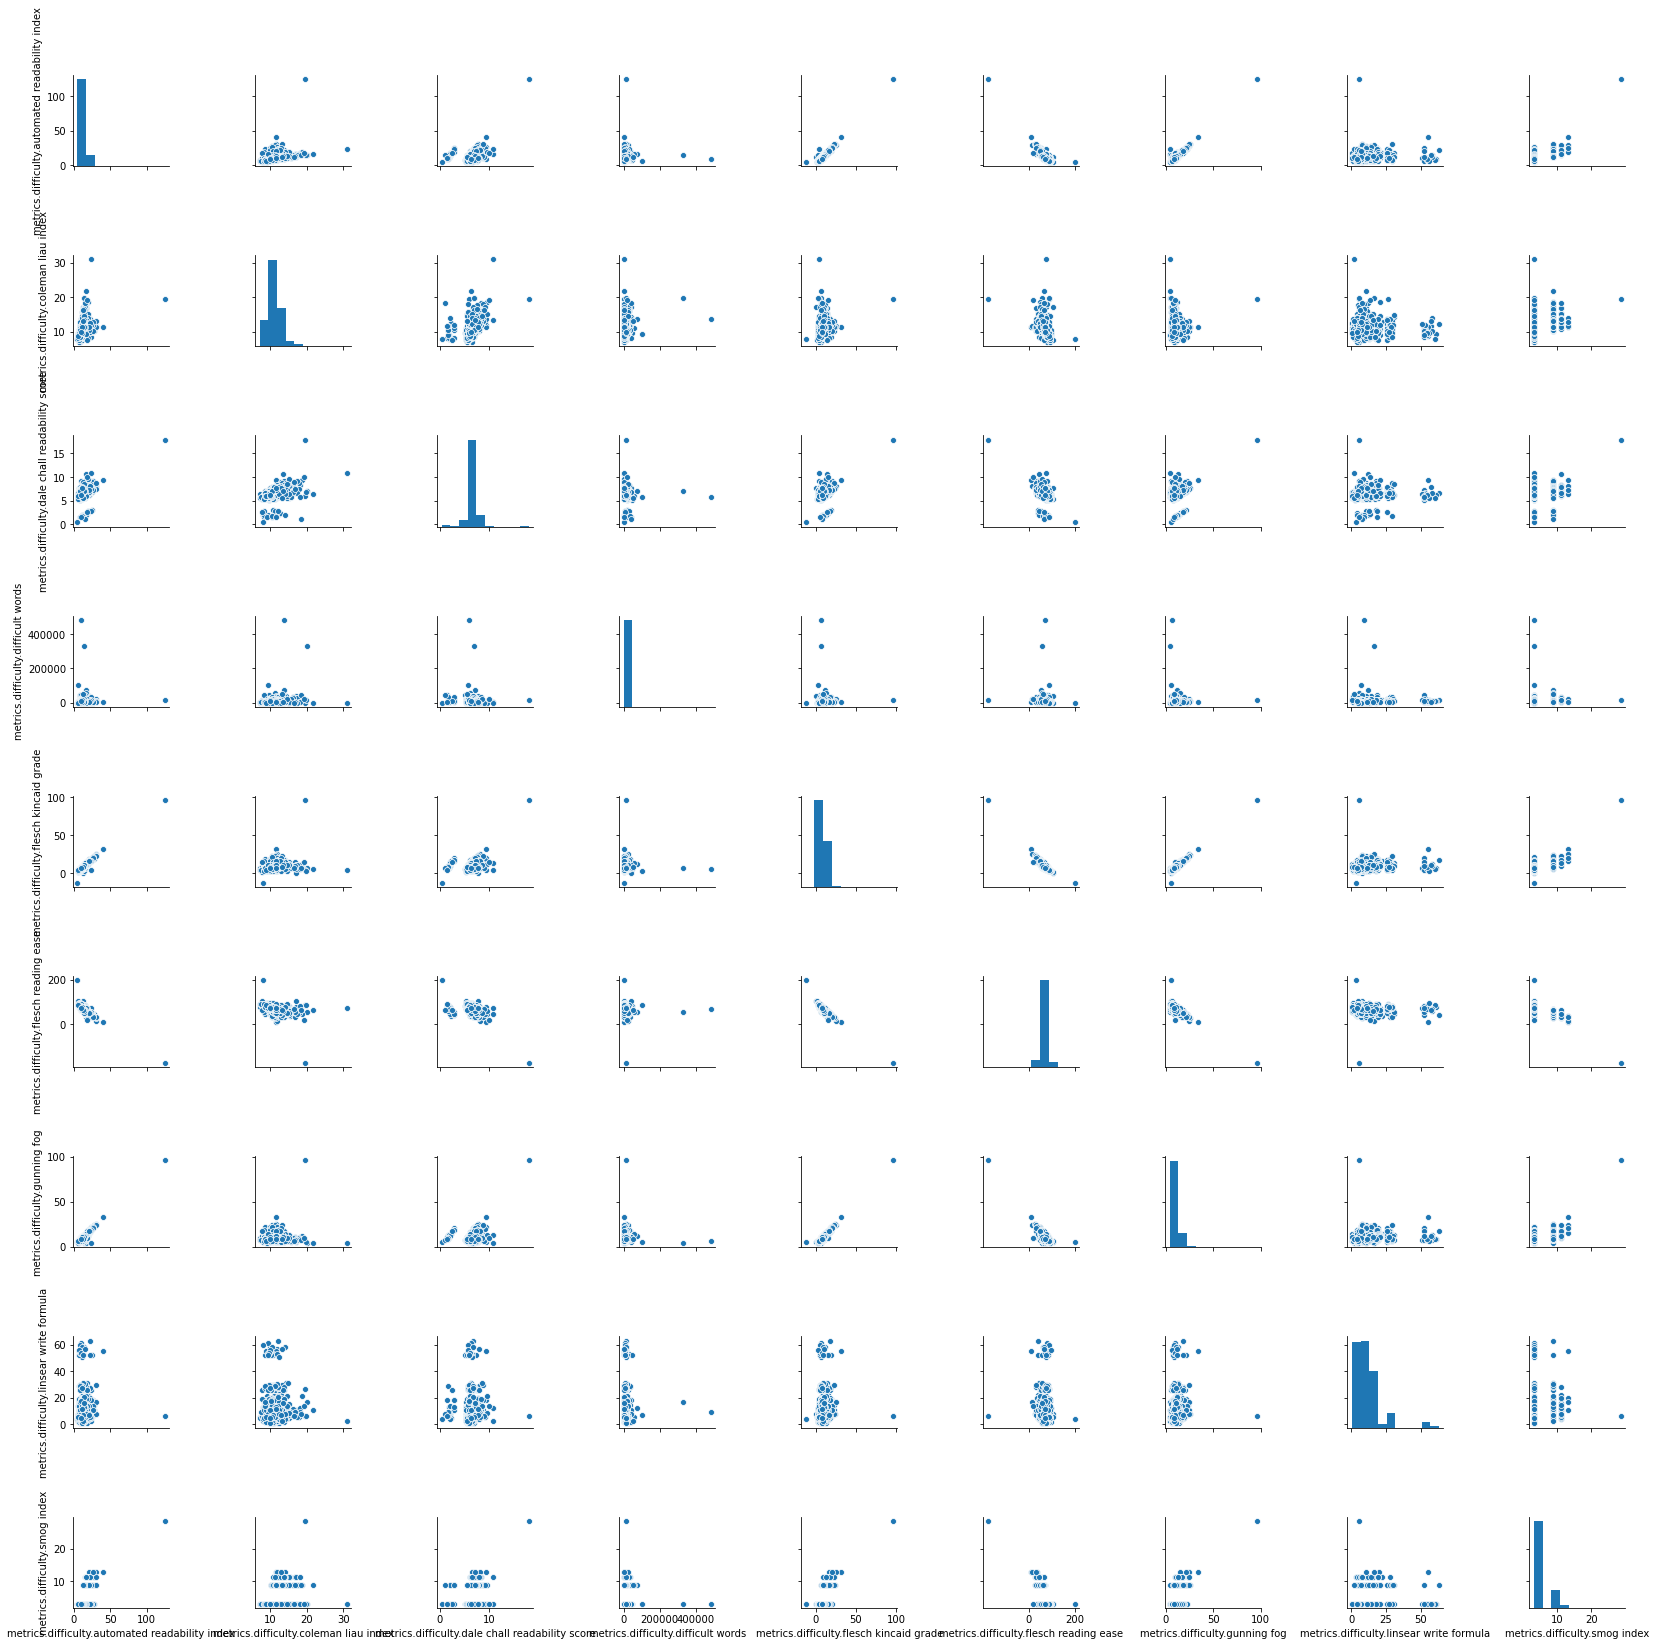

In [51]:
seaborn.pairplot(bookdiffdf)